# Experiment 3: PCA vs KPCA
As seen in Experiment one, the results of PCA and KPCA varied. In this section comparison between PCA and KPCA will be focused more on the confusion matrices that are produced from these methods.


### KPCA kernels
As explained in the Chapter Theory, KPCA can have kernels, which will project the data into a higher dimensional feature space, where a hyperplane can be constructed, and perform PCA on it. KPCA does not require the transformation of the inputs into the feature space with the kernel function, but can use the kernels so as to get the dot product of the pair-wise input points.

The kernels are a measure of similarity between the points \cite{sklearn}, and the kernels chosen for the experiment are the rbf and sigmoid kernels. The sigmoid kernel \textcquote{computes the sigmoid kernel between two vectors}{sci-kit-learn}, which outputs a value between -1 and 1 for the two given input vectors. The rbf kernel \textcquote{computes the radial basis functtion kernel between two vectors}{sklearn}, which outputs a value between 0 and 1.

After presenting the results form the previous experiments, comparison of PCA and KPCA with sigmoid kernel will be presented.


## Code is not relevant for the experiment

In [12]:
import idx2numpy 
from load_mnist import load_mnist
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
load_mnist()

X = idx2numpy.convert_from_file(
        'mnist_data/train_file_image').reshape(60000, 784)
y = idx2numpy.convert_from_file('mnist_data/train_file_label')
X_test = idx2numpy.convert_from_file(
        'mnist_data/test_file_image').reshape(10000, 784)
y_test = idx2numpy.convert_from_file('mnist_data/test_file_label')


I will define the functions for KPCA with two kernels, and PCA:

In [147]:
def run_pipeline_for_pca(X, y, X_test, y_test, n_components=49):
    pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=n_components)),
        ("classifier", SVC(kernel="linear", decision_function_shape="ovo", random_state=42))]
    )

    pipeline.fit(X, y)
    y_pred = pipeline.predict(X_test)

    cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap=plt.cm.Blues)
    #save the confusion matrix
    plt.savefig('src/results/experiment_three/confusion_matrix_pca_svm.png', bbox_inches='tight')
    return y_pred


In [141]:
import pandas as pd
from sklearn.metrics import classification_report

def run_pipeline_for_kpca(X, y, X_test, y_test, n_components=49, kernel='rbf'):
    pipeline = Pipeline(steps=[
    ('standard_scaler', StandardScaler()),
    ('kpca', KernelPCA(n_components=n_components, kernel='rbf', gamma=0.001)),
    ('classifier', SVC(kernel="linear",
                       decision_function_shape="ovo", random_state=42))
])

    pipeline.fit(X, y)

    y_pred = pipeline.predict(X_test)

    cm = ConfusionMatrixDisplay(confusion_matrix(
    y_test, y_pred)).plot(cmap=plt.cm.Blues)
    plt.savefig('results/experiment_three/kernel_pca_rbf_kernel_49.png',
           bbox_inches='tight')

    #The reason I need to return y_pred is because I need to use it in the next functions
    return y_pred



In [133]:
def run_pipeline_for_kpca_sigmoid(X, y, X_test, y_test, n_components=49, kernel='sigmoid'):
    pipeline = Pipeline(steps=[
    ('standard_scaler', StandardScaler()),
    ('kpca', KernelPCA(n_components=n_components, kernel='sigmoid', gamma=0.01)),
    ('classifier', SVC(kernel="linear",
                       decision_function_shape="ovo", random_state=42))
])

    pipeline.fit(X, y)

    y_pred = pipeline.predict(X_test)

    cm = ConfusionMatrixDisplay(confusion_matrix(
    y_test, y_pred)).plot(cmap=plt.cm.Blues)
 #   plt.savefig('results/experiment_three/.png',
 #          bbox_inches='tight')
 
    return y_pred


## Results
Here I will present the results( the confusion matrices ) for the methods

OSError: Cannot save file into a non-existent directory: '/results/experiment_three'

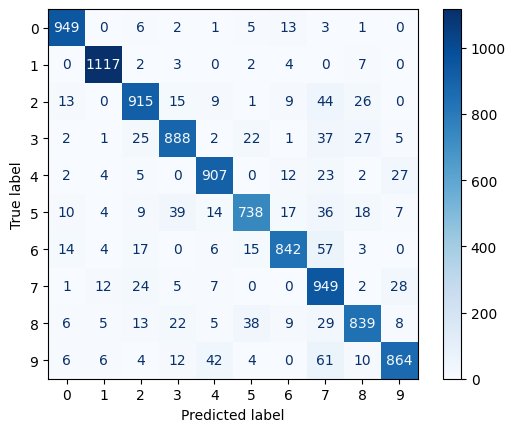

In [142]:
y_pred_kpca_rbf = run_pipeline_for_kpca(X[:15000], y[:15000], X_test, y_test, n_components=49)

FileNotFoundError: [Errno 2] No such file or directory: 'src/results/experiment_three/confusion_matrix_pca_svm.png'

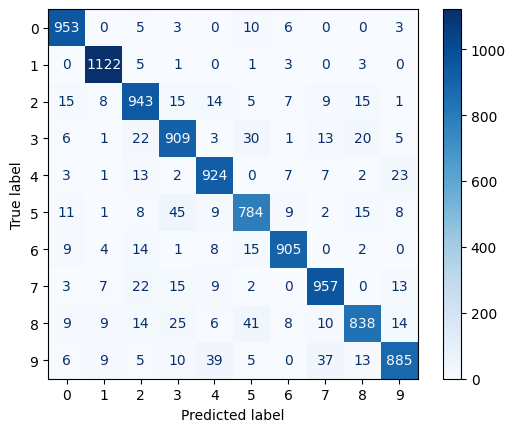

In [148]:
y_pred_pca = run_pipeline_for_pca(X[:15000], y[:15000], X_test, y_test, n_components=49)

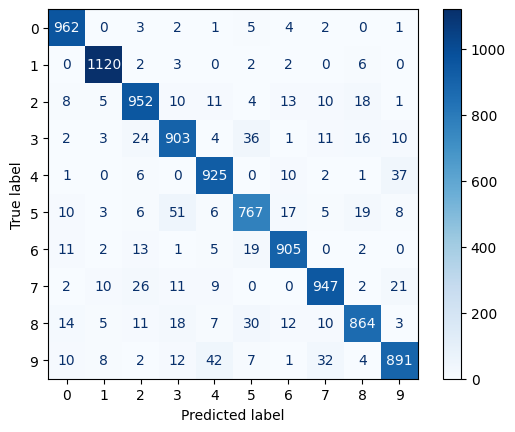

In [29]:
y_pred_kpca_sigmoid = run_pipeline_for_kpca_sigmoid(X[:15000], y[:15000], X_test, y_test, n_components=49)

## Presentation of results


##### PCA and KPCA-S

The values we can see are the following: I will refer to KPCA with sigmoid kernel as KPCA-S, and KPCA with RBF sigmoid as KPCA-R. A slight improvement over the number 0 has been seen in kpca-s in that it mapped 11 numbers better than pca, and the same it can be said for the number 2.

Both of the methods acquired the same amount of correct predictions for the number 3, and 4.

A slight difference appears in the number 5, where pca has got 780 correct predictions and kpca-s got 767, which is worse than PCA. The reason for that is because it confused it with the numbers 3 and 6.


A slight improvemet in kpca-s is seen at the number 6, where it got 5 numbers more than pca. Such a low number might not be worth considering though.

It can be seen that sigmoid confuses the number 7 with the number 9 more often than pca normally would, which worsens kpca-s ability to correctly predict the number 7.

An improvement of kpca-s over pca is mostly remarkable at the number 8. It is interesting to note that the number 8, despite having circles that could resemble the number 9, did not seem to have that much of an effect on kpca-s, which means that it did not find similarities between 8 and 9 as much as pca did. However, kpca-s seems to confuse it more ofen with other numbers that pca does not, an example being the numbers 0 and 6.


The notable impressions regarding the differences between pca and kpca-s are: kpca-s improved by about 10 numbers at the numbers 0, and 2, became worse at the number 5, became worse at the number 7, and shined the most at the number 8. The most interesting cases are the number 0,2 5, and 8.

#### KPCA-R as contestant
The RBF kernel has confused more number 2's than any other method presented in this experiment. As opposed to PCA and KPCA-S, KPCA-R confused it 33 times more with the number 7, and around 10 times more with the number 8. The same pattern can be seen at the number 3, where it was again confused with numbers 7 and 8.


KPCA-R has confused the number 4 mostly with the numbers 7 and 9, and KPCA-S has only confused it with the number 9. With respect to the number 4, KPCA-S is the only method that has confused it the most with the number 9.


KPCA-R mostly confuses the number 5 with the numbers 3 and 7, where as KPCA-S does it with the numbers 3, 6 and 8, and the same can be said about PCA.


The number 6 reveals an interting finding: KPCA-R is the only method that managed to confuse the number 6 with the number 7.

The only place where KPCA-R outshines KPCA-S is at the number 7, where KPCA-R confuses with two numbers less than KPCA-S, but such finding is not ground-breaking, because it is overshowed again by the fact that RBF-R is underperforming at the last numbers 8 and 9. At the number 8 KPCA-R performs slightly worse than PCA, and at the number 9 KPCA-R confuses it with the number 7 almost double as much as KPCA-S.


#### Confusion matrices compared
From the results presented so far about the differences between the kernels it can be seen that all the methods often confuse the number 2 with 8; 3 with 2,5,8 and to a certain degree(PCA and much worse with KPCA-R), 7. The methods also confuse the number 4 with 9; 5 with 3,6, and 8 (KPCA-R also does it with 7). The number 6 gets confused with the numbers 0,2,5 (KPCA-R also does it with 7).
The number 7 gets confused with the number 2,3 and 9. KPCA-R is the only one that did not confuse the number 3 as much as the other methods.

At number 8 the methods have confused 0 (with the exception of KPCA-R),2,3 and 5. KPCA-R confused it again with the number 7, but it is the only one that managed to map the number 0 less than the other methods. Lastly the number 9 got confused with the numbers the most with the numbers 4 and 7. It can be further noted that KPCA-R is the worst at confusing various numbers with the number 7.



## Helpers
The helpers are made for making it able to get the numbers that were confused

In [120]:
def give_numbers_for_class(y_pred, y_test, class_number):
    list_of_image_indices = []
    list_of_wrongly_classified = []
    list_of_wrong_predictions = []
    list_of_class_numbers = []
    total_number = 0

    for i in range(len(y_pred)):
        if  y_pred[i] != y_test[i] and y_test[i] == class_number:
            list_of_image_indices.append(i)
            list_of_wrongly_classified.append(X_test[i])
            list_of_wrong_predictions.append(y_pred[i])
            list_of_class_numbers.append(y_test[i])
            total_number += 1
        
        if y_pred[i] == y_test[i] and y_test[i] == class_number:
            total_number += 1
    return list_of_image_indices, list_of_wrongly_classified, list_of_wrong_predictions, list_of_class_numbers, total_number


def give_numbers_for_class_for_specific_number(y_pred, y_test, class_number, specific_number):
    list_of_image_indices = []
    list_of_wrongly_classified = []
    list_of_wrong_predictions = []
    list_of_class_numbers = []
    total_number = 0

    for i in range(len(y_pred)):
        if  y_pred[i] != y_test[i] and y_test[i] == class_number and y_pred[i] == specific_number:
            list_of_image_indices.append(i)
            list_of_wrongly_classified.append(X_test[i])
            list_of_wrong_predictions.append(y_pred[i])
            list_of_class_numbers.append(y_test[i])
            total_number += 1
        
        if y_pred[i] == y_test[i] :
            total_number += 1
    return list_of_image_indices, list_of_wrongly_classified, list_of_wrong_predictions, list_of_class_numbers, total_number


#plot image for a specific number for a specific class
def plot_image_for_specific_number_for_specific_class(y_pred, y_test, class_number, specific_number):
    list_of_image_indices, list_of_wrongly_classified, list_of_wrong_predictions, list_of_class_numbers = give_numbers_for_class_for_specific_number(y_pred, y_test, class_number, specific_number)
    for i in range(len(list_of_wrongly_classified)):
        plt.imshow(list_of_wrongly_classified[i].reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {list_of_wrong_predictions[i]} Actual: {list_of_class_numbers[i]}")
        plt.show()

def get_percentage_of_numbers_from_class_predicted_wrong_percentage(y_pred, y_test, class_number):
    list_of_image_indices, list_of_wrongly_classified, list_of_wrong_predictions, list_of_class_numbers,total_number = give_numbers_for_class(y_pred, y_test, class_number)
    return 100 - ((total_number - len(list_of_wrongly_classified))/ total_number) * 100

def get_percentage_of_numbers_for_method(y_pred, y_test):
    list_of_percentages = []
    for i in range(10):
        list_of_percentages.append(get_percentage_of_numbers_from_class_predicted_wrong_percentage(y_pred, y_test, i))
    return list_of_percentages

def difference_between_two_methods(method_one, method_two):
    list_of_differences = []
    for i in range(len(method_one)):
        list_of_differences.append(method_one[i] - method_two[i])
    return list_of_differences


Now I am able to output the numbers that were confused

In [137]:


pca_cm = get_percentage_of_numbers_for_method(y_pred_pca, y_test)
kpca_s_cm = get_percentage_of_numbers_for_method(y_pred_kpca_sigmoid, y_test)
kpca_r_cm = get_percentage_of_numbers_for_method(y_pred_kpca_rbf, y_test)

difference_between_two_methods(pca_cm, kpca_s_cm)
kpca_r_cm



[3.1632653061224545,
 1.5859030837004298,
 11.337209302325576,
 12.079207920792072,
 7.63747454175153,
 17.264573991031398,
 12.108559498956168,
 7.684824902723733,
 13.860369609856264,
 14.370664023785935]

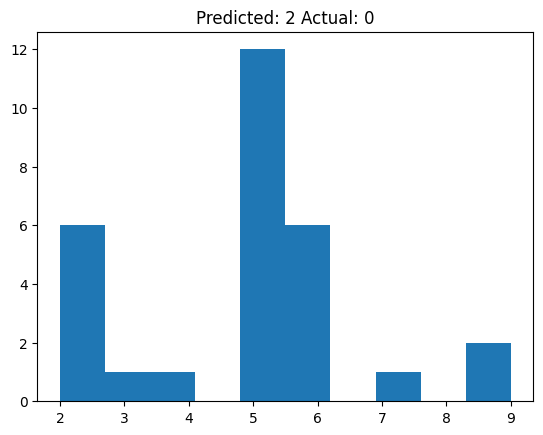

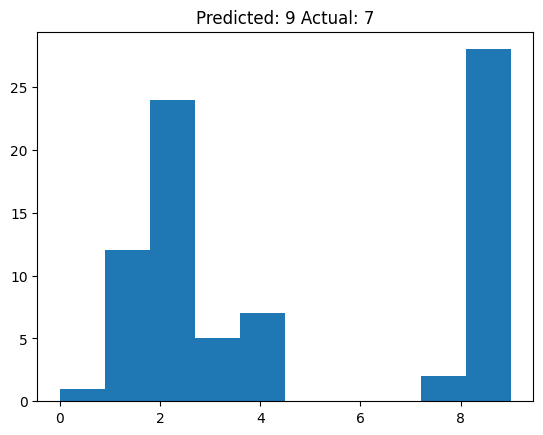

In [146]:
#plot the distribution of wrong numbers for a specific class
def plot_distribution_of_wrong_numbers_for_specific_class(y_pred, y_test, class_number):
    list_of_image_indices, list_of_wrongly_classified, list_of_wrong_predictions, list_of_class_numbers, total_number = give_numbers_for_class(y_pred, y_test, class_number)
    plt.hist(list_of_wrong_predictions, bins=10)
    plt.title(f"Predicted: {list_of_wrong_predictions[i]} Actual: {list_of_class_numbers[i]}")
    plt.show()

plot_distribution_of_wrong_numbers_for_specific_class(y_pred_pca, y_test, 0)
plot_distribution_of_wrong_numbers_for_specific_class(y_pred_kpca_rbf, y_test, 7)

In [ ]:
plot_image_for_specific_number_for_specific_class(y_pred_kpca_sigmoid, y_test, 8,9)

#### Discussion of results
Several things from the results about the behavior for different methods were mentioned in this experiment. The most interesting finding will be explored in this section. The finding are as follows:

The highlights from the results are:
- KPCA-R is the only kernel PCA-derivative method that confused the number 6 with the number 7, and also confused many numbers with the number 7.
- Sigmoid KPCA-S seems to perform better than KPCA-R on most cases, and therefore will be more interesting to compare the confusions created by PCA and KPCA-S
- PCA confused the number 8 with the number 9 ten times more than KPCA-S
- PCA confused the number 0 with the number 5 much more than KPCA-S, and KPCA-R did the same, but with the number 6.
- PCA confused the number 2 with the numbers 1 and 3, while KPCA-S did it fewer times.

The fact that PCA confused the number 8 with the number 9 might be justified due to PCA mapping the number 9 into a space where slightly if the number is slightly rotated / curved, it might look like a 9. In some cases it looked like it could be confused with the number 9, but in other cases the confusion was not fully justified, as it could be deduced that the number was an 8. In comparison, kpca-s has only got three numbers confused.

One case for kpca-s, the number 8 was slightly tilted, shich again shows a minor tendence towards associating a tilted number 8 as being a number 9. The other two numbers do not fully justify the confusion though.

From the comparison between PCA and kpca-s it can be concluded that the sigmoid kernel does a good job at eliminating 